<a href="https://colab.research.google.com/github/Mateus-Brandao/Data-Analytics/blob/main/Analise_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neste relatório é realizada uma análise exploratória dos dados de 800 pokemons.

## Foram respondidas as seguintes questões

### Top 5 pokemons com maior ataque:
* Mega Mewtwo X com 190
* Mega Heracross com 185
* Primal Groudon com 180
* Mega Rayquaza com 180
* Deoxys Attack Form com 180

### Top 5 pokemons com maior defesa:
* Shuckle com 230
* Mega Steelix com 230
* Mega Aggron com 230
* Steelix com 200
* Regirock com 200

### Top 5 pokemons com maior velocidade:
* Deoxys Speed Forme com 180
* Ninjask com 160
* Deoxys Normal Forme com 150
* Mega Aerodactyl com 150
* Mega Alakazam com 150

### Top 5 pokemons com maior ataque especial:
* Mega Mewtwo Y com 194
* Primal Kyogre com 180
* DeoxysAttack Forme com 180
* Mega Rayquaza com 180
* Mega Alakazam com 175

### Top 5 pokemons com maior defesa especial:
* Shuckle com 230
* Regice com 200
* Deoxys Defense Forme com 160
* Primal Kyogre com 160
* Ho-oh com 154

### Top 5 pokemons com maior HP:
* Blissey com 255
* Chansey com 250
* Wobbuffet com 190
* Wailord com 170
* Alomomola com 165

### Tipos primários de pokemons com mais registros na pokedex:
* Water com 112 pokemons
* Normal com 98 pokemons
* Grass com 70 pokemons

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
dados = pd.read_csv("pokemon.csv")
dados.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [4]:
dados['Type 2'].fillna('-', inplace = True)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
dados.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
dados.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


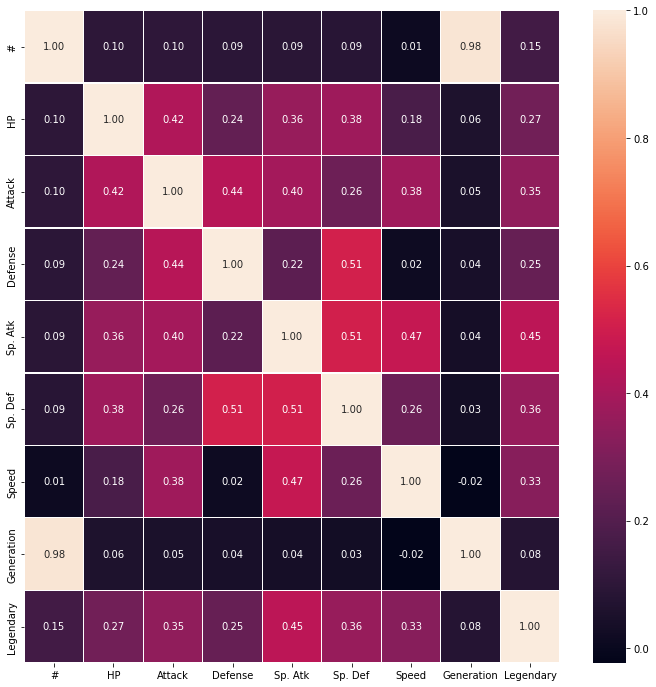

In [8]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(dados.corr(), annot=True,fmt=".2f",linewidths=.3,ax = ax)

plt.show()

É possível verificar que quanto maior a geração do pokemon, maior é seu número na pokedex, que seria a coluna #.

## Análise dos tipos de pokemons registrados

In [9]:
print(dados['Type 1'].value_counts(dropna=False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [10]:
print(dados['Type 2'].value_counts(dropna=False))

-           386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64


## Comparação entre pokemons lendários e não lendários

In [11]:
dados.groupby(['Legendary']).mean().drop(columns = ['#', 'Generation'])

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Legendary,,,,,,
False,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
True,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615


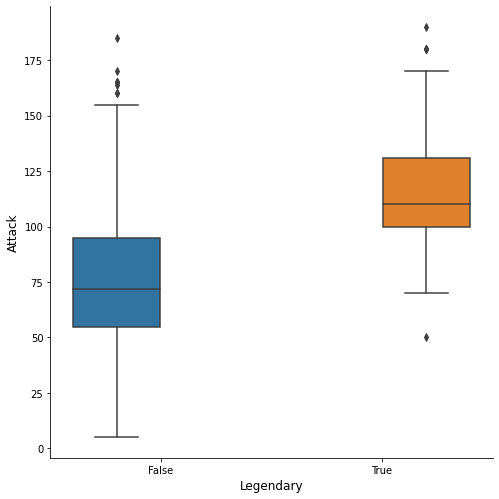

In [12]:
ax = sns.catplot(data = dados, y = 'Attack', x = 'Legendary', hue = 'Legendary', kind = 'box', height = 7)
plt.ylabel('Attack', fontsize = 12)
plt.xlabel('Legendary', fontsize = 12)
plt.title("")

plt.show()

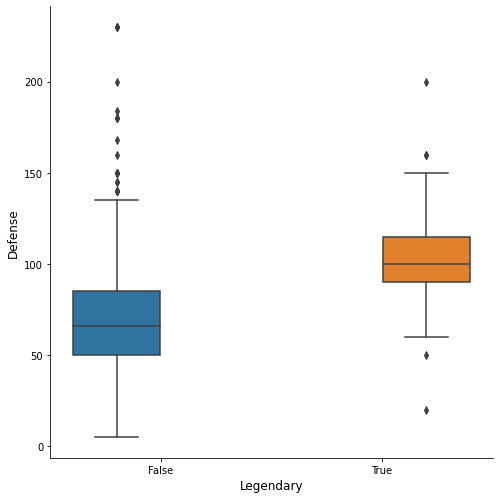

In [13]:
ax = sns.catplot(data = dados, y = 'Defense', x = 'Legendary', hue = 'Legendary', kind = 'box', height = 7)
plt.title("")
plt.ylabel('Defense', fontsize = 12)
plt.xlabel('Legendary', fontsize = 12)

plt.show()

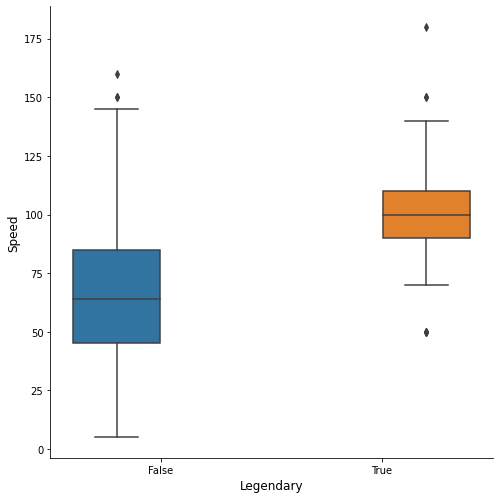

In [14]:
ax = sns.catplot(data = dados, y = 'Speed', x = 'Legendary', hue = 'Legendary', kind = 'box', height = 7)
plt.title("")
plt.ylabel('Speed', fontsize = 12)
plt.xlabel('Legendary', fontsize = 12)

plt.show()

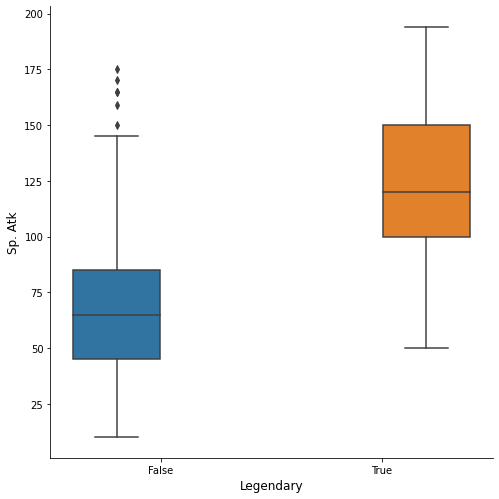

In [15]:
ax = sns.catplot(data = dados, y = 'Sp. Atk', x = 'Legendary', hue = 'Legendary', kind = 'box', height = 7)
plt.title("")
plt.ylabel('Sp. Atk', fontsize = 12)
plt.xlabel('Legendary', fontsize = 12)

plt.show()

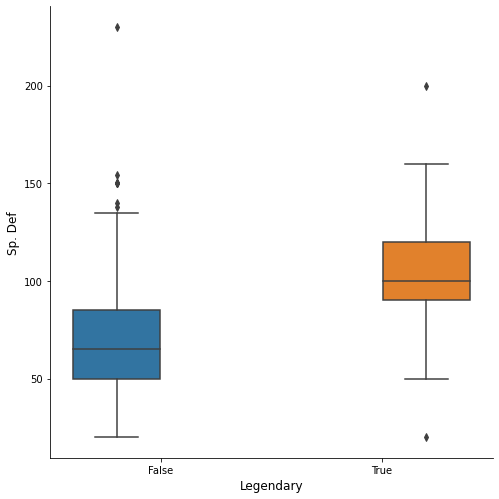

In [16]:
ax = sns.catplot(data = dados, y = 'Sp. Def', x = 'Legendary', hue = 'Legendary', kind = 'box', height = 7)
plt.title("")
plt.ylabel('Sp. Def', fontsize = 12)
plt.xlabel('Legendary', fontsize = 12)

plt.show()

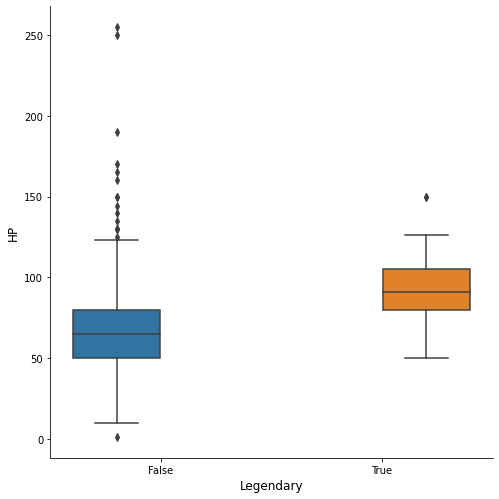

In [17]:
ax = sns.catplot(data = dados, y = 'HP', x = 'Legendary', hue = 'Legendary', kind = 'box', height = 7)
plt.title("")
plt.ylabel('HP', fontsize = 12)
plt.xlabel('Legendary', fontsize = 12)

plt.show()

É possível verificar que pokemons lendários possuem uma média de status muito maior do que os pokemons não lendários.

## Histogramas dos Status

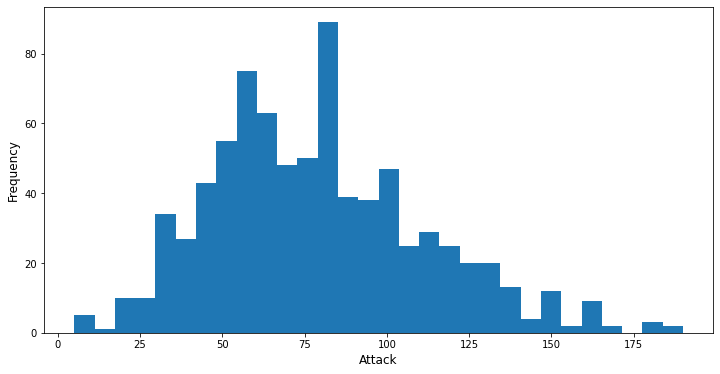

In [18]:
plt.figure(figsize=(12,6))
plt.hist(x = dados['Attack'], bins = 30)
plt.xlabel('Attack', fontsize = 12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

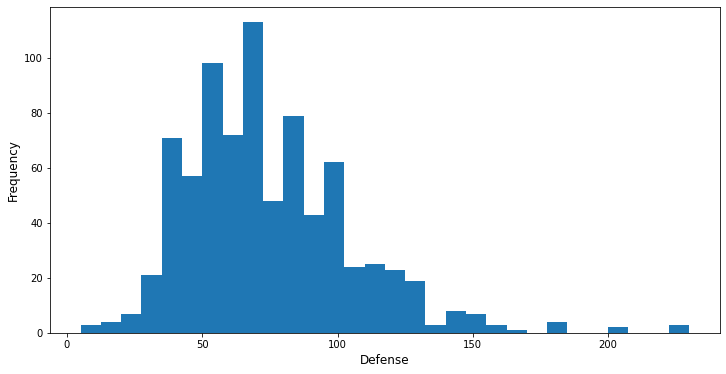

In [19]:
plt.figure(figsize=(12,6))
plt.hist(x = dados['Defense'], bins = 30)
plt.xlabel('Defense', fontsize = 12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

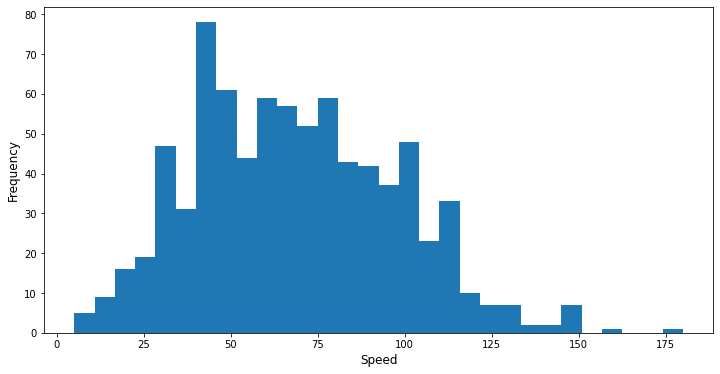

In [20]:
plt.figure(figsize=(12,6))
plt.hist(x = dados['Speed'], bins = 30)
plt.xlabel('Speed', fontsize = 12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

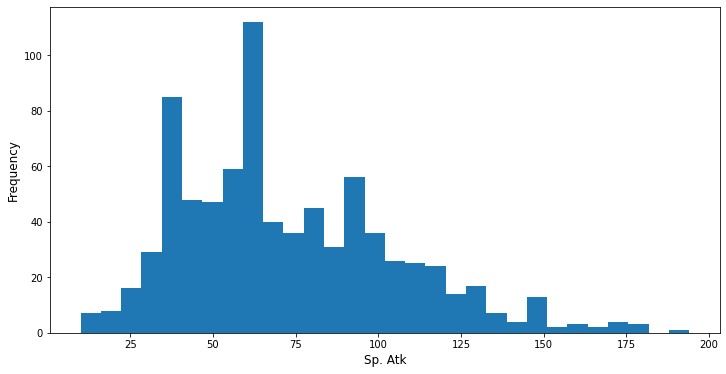

In [21]:
plt.figure(figsize=(12,6))
plt.hist(x = dados['Sp. Atk'], bins = 30)
plt.xlabel('Sp. Atk', fontsize = 12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

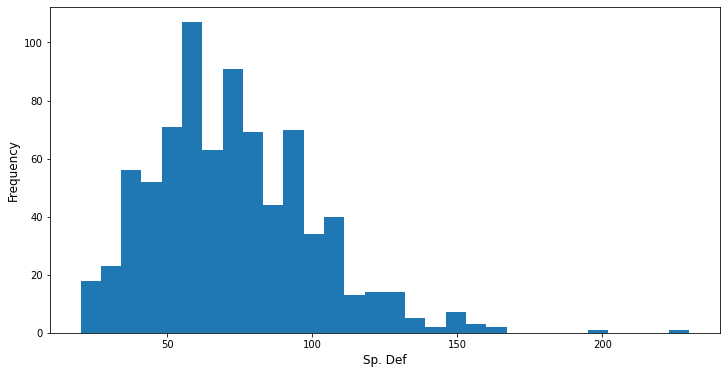

In [22]:
plt.figure(figsize=(12,6))
plt.hist(x = dados['Sp. Def'], bins = 30)
plt.xlabel('Sp. Def', fontsize = 12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

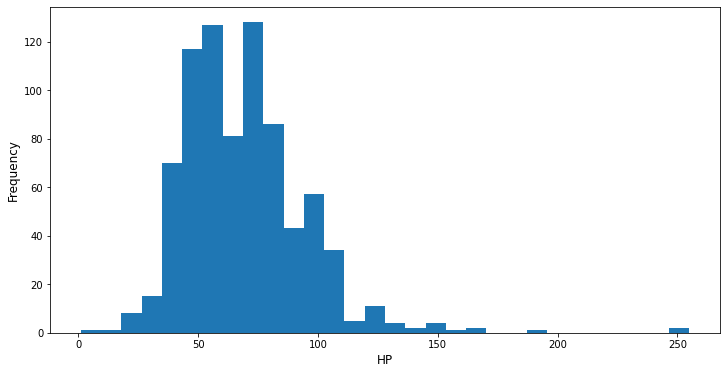

In [23]:
plt.figure(figsize=(12,6))
plt.hist(x = dados['HP'], bins = 30)
plt.xlabel('HP', fontsize = 12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## Top 5 dos status

In [24]:
top_5_atk = dados.sort_values(by = 'Attack', ascending = False).head()
top_5_atk

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
232,233,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
429,430,DeoxysAttack Forme,Psychic,-,50,180,20,180,20,150,3,True


In [25]:
top_5_def = dados.sort_values(by = 'Defense', ascending = False).head()
top_5_def

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,-,70,140,230,60,80,50,3,False
223,224,Steelix,Steel,Ground,75,85,200,55,65,30,2,False
414,415,Regirock,Rock,-,80,100,200,50,100,50,3,True


In [26]:
top_5_spd = dados.sort_values(by = 'Speed', ascending = False).head()
top_5_spd

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,432,Deoxys Speed Forme,Psychic,-,50,95,90,95,90,180,3,True
315,316,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False
428,429,Deoxys Normal Forme,Psychic,-,50,150,50,150,50,150,3,True
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False
71,72,Mega Alakazam,Psychic,-,55,50,65,175,95,150,1,False


In [27]:
top_5_spatk = dados.sort_values(by = 'Sp. Atk', ascending = False).head()
top_5_spatk

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,165,Mega Mewtwo Y,Psychic,-,106,150,70,194,120,140,1,True
422,423,Primal Kyogre,Water,-,100,150,90,180,160,90,3,True
429,430,DeoxysAttack Forme,Psychic,-,50,180,20,180,20,150,3,True
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
71,72,Mega Alakazam,Psychic,-,55,50,65,175,95,150,1,False


In [28]:
top_5_spdef = dados.sort_values(by = 'Sp. Def', ascending = False).head()
top_5_spdef

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
415,416,Regice,Ice,-,80,50,100,100,200,50,3,True
430,431,Deoxys Defense Forme,Psychic,-,50,70,160,70,160,90,3,True
422,423,Primal Kyogre,Water,-,100,150,90,180,160,90,3,True
270,271,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True


In [29]:
top_5_hp = dados.sort_values(by = 'HP', ascending = False).head()
top_5_hp

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,262,Blissey,Normal,-,255,10,10,75,135,55,2,False
121,122,Chansey,Normal,-,250,5,5,35,105,50,1,False
217,218,Wobbuffet,Psychic,-,190,33,58,33,58,33,2,False
351,352,Wailord,Water,-,170,90,45,90,45,60,3,False
655,656,Alomomola,Water,-,165,75,80,40,45,65,5,False
